<a href="https://colab.research.google.com/github/RoshniSeth/Supervised-Machine-Learning-Algorithms/blob/main/Classification_Algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification Algorithms**

The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups. Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

The algorithm which implements the classification on a dataset is known as a classifier.

There are two types of Classifications:

* **Binary Classifier:** If the classification problem has only two
  possible outcomes, then it is called as Binary Classifier.
  Examples: YES or NO, MALE or FEMALE, SPAM or NOT SPAM, CAT or DOG, etc.
***Multi-class Classifier**: If a classification problem has more    than two outcomes, then it is called as Multi-class Classifier.
Example: Classifications of types of crops, Classification of types of music.

<center>

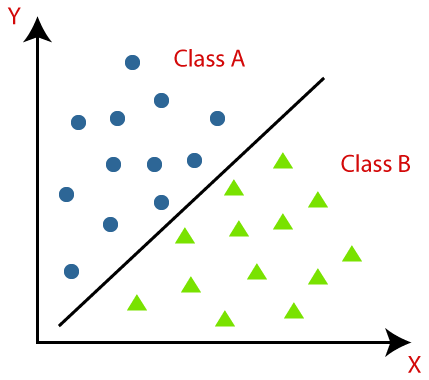

</center>

##**Support Vector Machine (SVM)**

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.



This case study includes the dataset which contains the information of various users. There is a car making company that has recently launched a new SUV car. So the company wanted to check how many users from the dataset, wants to purchase the car.

For this problem, we will build a Machine Learning model using the Support Vector Machine algorithm.  In this problem, we will predict the purchased variable (Dependent Variable) by using age and salary (Independent variables).

<center>

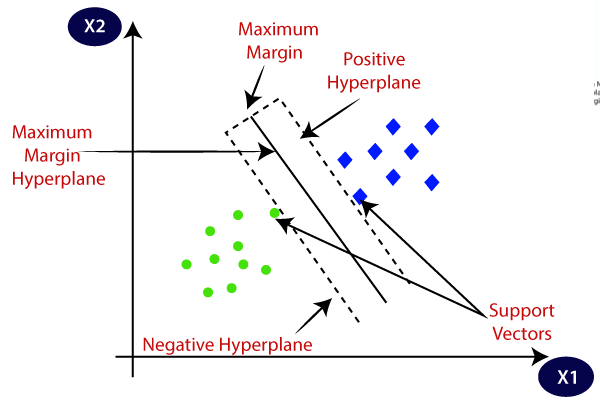
</center>

To implement the Support Vector Machine algorithm, the steps are as follows:
1.  Loading the dataset
2.  Data Pre-processing step
3.  Splitting the dataset into train and test dataset
4.  Fitting SVM to the training set
5.  Predicting the test result
6.  Test accuracy of the result(Creation of Confusion Matrix)



In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Connecting the drive to colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Loading the dataset**


In [ ]:
user_data=pd.read_excel('/content/drive/MyDrive/datasets/car_purchase.xlsx')
print(user_data.head())

    User_Id  Gender  Age  Estimated_Salary  Purchased
0  15624510    male   19             19000          0
1  15810944    male   35             20000          0
2  15668575  female   26             43000          0
3  15603246  female   27             57000          0
4  15804002    male   19             76000          0


####**About the dataset**

The Data description is as follows:

user_id: It depicts the unique id provided by the company to the user.

gender: It depicts the gender of the user.

age: It depicts the age of the user.

estimated_salary: It depicts the salary of the user estimate by the company.

purchased: The purchase of new SUV car (0 = purchasing the car, 1 = not purchasing the car )






####**Pre-processing the dataset**

In [ ]:
print("Number of rows and columns in dataset= ",user_data.shape)
print()
print("Information about dataset: ")
print()
print(user_data.info())
print()
print("Null values in the dataset: ")
print()
print(user_data.isnull().sum())

Number of rows and columns in dataset=  (22, 5)

Information about dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_Id           22 non-null     int64 
 1   Gender            22 non-null     object
 2   Age               22 non-null     int64 
 3   Estimated_Salary  22 non-null     int64 
 4   Purchased         22 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1008.0+ bytes
None

Null values in the dataset: 

User_Id             0
Gender              0
Age                 0
Estimated_Salary    0
Purchased           0
dtype: int64


**Analysis**-> From the above code, we found that the dataset does not contain any null values and the column names and there datatypes are correct.There are 22 rows and 5 columns in the dataset.

####**Splitting the dataset into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(user_data,test_size=0.25,random_state=0)
print(train_data.head())
print(test_data.head())

     User_Id  Gender  Age  Estimated_Salary  Purchased
11  15606274  female   26             52000          0
19  15621083  female   48             29000          1
8   15600575    male   25             33000          0
6   15598044  female   27             84000          0
16  15733883    male   47             25000          1
     User_Id  Gender  Age  Estimated_Salary  Purchased
20  15649487    male   45             22000          1
10  15570769  female   26             80000          0
14  15628972    male   18             82000          0
13  15704987    male   32             18000          0
1   15810944    male   35             20000          0


In [ ]:
# Splitting the train and test set into target and feature values

x_train=train_data.iloc[:,2:4]
#print(x_train.head())
y_train=train_data.iloc[:,4]
#print(y_train.head())

x_test=test_data.iloc[:,2:4]
#print(x_test.head())
y_test=test_data.iloc[:,4]

**Analysis**-> The dataset contains 5 columns in which the age and estimated_salary will be consider as the independent variables and the purchased will be consider as the dependent variable.

In the above code, we have taken [:,2:4] for x_train and x_test because our independent variables are age and estimated_salary which are at index 2 and 3. And we have taken [:,4] for y_train and y_test variable because our dependent variable is at index 4.

####**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_trains=st_x.fit_transform(x_train)
x_tests=st_x.fit_transform(x_test)
# print(x_trains)
#print(x_tests)

**Analysis**-> In SVM, we have done feature scaling because we want accurate result of predictions. Here we have only scale the independent variable because dependent variable have only 0 and 1 values.Our dataset is well pre-processed after feature scaling.

####**Fitting SVM to the training set**

In [ ]:
from sklearn.svm import SVC                            # support vector classifier
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_trains,y_train)
score=classifier.score(x_trains,y_train)
print('Score= ',score)

Score=  1.0


**Analysis**-> After well preparing our dataset, we have trained the dataset using the training set. For providing training or fitting the model to the training set, we have imported the SVM class of the sklearn library.

After importing the class, we have created a classifier object and use it to fit the model to the SVC Classifier. After that we have checked the score and the score is 1.0 which shows that the model is performing well.

####**Predicting the test result**

In [ ]:
y_predict=classifier.predict(x_tests)
print(y_predict)

[1 0 0 0 0 1]


**Analysis**-> The above code shows the values predicted by the model by only giving the test values.

####**Test accuracy of the result(Creation of Confusion Matrix)**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[4 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



**Analysis**-> In the above cell, the accuracy of the predicted result is calculated by interpreting the confusion matrix. By above output, we can interpret that 4+2=6 (Correct Output) and 0+0= 0(Incorrect Output).

The classification report shows that the model is predicting 0 more as compared to 1.



---



---



---



##**K-Nearest Neighbor(KNN) Algorithm**

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. It assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.It stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.It can be used for Regression as well as for Classification but mostly it is used for the Classification problems.It is a non-parametric algorithm, which means it does not make any assumption on underlying data.It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset and at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


<center>

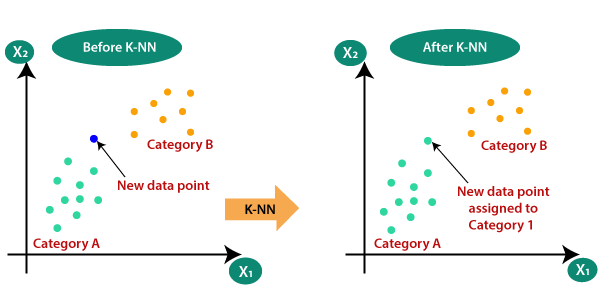
</center>



To implement the KNN algorithm, the steps are as follows:

1. Loading the dataset
2. Data Pre-processing step
3. Splitting the dataset into train and test dataset
4. Fitting SVM to the training set
5. Predicting the test result
6. Test accuracy of the result(Creation of Confusion Matrix)

####**Loading the dataset**

In [ ]:
patient_data=pd.read_csv('/content/drive/MyDrive/datasets/Breast_cancer_data.csv')
print(patient_data.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


####**About the dataset**

The Data description is as follows:

diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign) where malignant denotes that the disease is harmful

mean_radius: mean of distances from center to points on the perimeter

mean_texture: standard deviation of gray-scale values

mean_perimeter: mean size of the core tumor

mean_area: mean area of the core tumor


####**Pre-processing the dataset**

In [ ]:
print("Number of rows and columns in dataset= ",patient_data.shape)
print()
print("Information about dataset: ")
print()
print(patient_data.info())
print()
print("Null values in the dataset: ")
print()
print(patient_data.isnull().sum())

Number of rows and columns in dataset=  (569, 6)

Information about dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None

Null values in the dataset: 

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


**Analysis**-> From the above code, we found that the dataset does not contain any null values and the column names and there datatypes are correct.There are 569 rows and 6 columns in the dataset.

####**Splitting the dataset into train and test set**

In [ ]:
#print(patient_data.head())

# Splitting dependent and independent values
x=patient_data.iloc[:,:5]
#print(x.head())
y=patient_data.iloc[:,5]
#print(y.head())

# Splitting into training and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())


     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
293        11.85         17.46           75.54      432.7          0.08372
332        11.22         19.86           71.94      387.3          0.10540
565        20.13         28.25          131.20     1261.0          0.09780
278        13.59         17.84           86.24      572.3          0.07948
489        16.69         20.20          107.10      857.6          0.07497
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
512        13.40         20.52           88.64      556.7          0.11060
457        13.21         25.25           84.10      537.9          0.08791
439        14.02         15.66           89.59      606.5          0.07966
298        14.26         18.17           91.22      633.1          0.06576
37         13.03         18.42           82.61      523.8          0.08983
293    1
332    1
565    0
278    1
489    0
Name: diagnosis, dtype: int64
512    0
457    1
439    

**Analysis**-> The dataset contains 6 columns in which the mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness will be consider as the independent variables and the diagonsis will be consider as the dependent variable.

In the above code, we have taken [:,:5] for x because our independent variables are  mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness, which are at index 0 to 4. And we have taken [:,5] for y variable because our dependent variable is at index 5.

####**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_trains=st_x.fit_transform(x_train)
#print(x_trains)
x_tests=st_x.fit_transform(x_test)
#print(x_tests)

**Analysis**-> In KNN, we have done feature scaling because we want accurate result of predictions. Here we have only scale the independent variable because dependent variable have only 0 and 1 values.Our dataset is well pre-processed after feature scaling

####**Fitting KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_trains,y_train)
score=classifier.score(x_trains,y_train)
print(round(score,3))

0.939


**Analysis**-> After well preparing our dataset, we have trained the dataset using the training set. For providing training or fitting the model to the training set, we have imported the KNeighborsClassifier class of the sklearn library.

After importing the class, we have created a classifier object and use it to fit the model to the KNN Classifier. After that we have checked the score and the score is 0.939 which shows are model is performing well.

####**Predicting the test result**

In [ ]:
y_predict=classifier.predict(x_tests)
print(y_predict)

[1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0]


**Analysis**-> The above code shows the values predicted by the model by only giving the test values.

####**Test accuracy of the result(Creation of Confusion Matrix)**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[45  8]
 [ 7 83]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        53
           1       0.91      0.92      0.92        90

    accuracy                           0.90       143
   macro avg       0.89      0.89      0.89       143
weighted avg       0.89      0.90      0.89       143



**Analysis**-> In the above cell, the accuracy of the predicted result is calculated by interpreting the confusion matrix. By above output, we can interpret that 45+83= 128 (Correct Output) and 8+7= 15(Incorrect Output).

The classification report shows that the model is predicting 1 more as compared to 0.



---



---



---



##**Logistic Regression**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.It predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.It is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.It is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.It can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification.

<center>

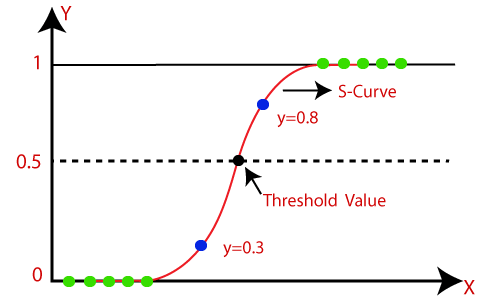

</center>

To implement the Support Vector Machine algorithm, the steps are as follows:

1. Loading the dataset
2. Data Pre-processing step
3. Splitting the dataset into train and test dataset
4. Fitting SVM to the training set
5. Predicting the test result
6. Test accuracy of the result(Creation of Confusion Matrix)

####**Loading the dataset**

In [ ]:
patient_data=pd.read_csv('/content/drive/MyDrive/datasets/Breast_cancer_data.csv')
print(patient_data.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


####**About the dataset**

The Data description is as follows:

diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign) where malignant denotes that the disease is harmful

mean_radius: mean of distances from center to points on the perimeter

mean_texture: standard deviation of gray-scale values

mean_perimeter: mean size of the core tumor

mean_area: mean area of the core tumor


####**Pre-processing the dataset**

In [ ]:
print("Number of rows and columns in dataset= ",patient_data.shape)
print()
print("Information about dataset: ")
print()
print(patient_data.info())
print()
print("Null values in the dataset: ")
print()
print(patient_data.isnull().sum())

Number of rows and columns in dataset=  (569, 6)

Information about dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None

Null values in the dataset: 

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


**Analysis**-> From the above code, we found that the dataset does not contain any null values and the column names and there datatypes are correct.There are 569 rows and 6 columns in the dataset.

####**Splitting the dataset into train and test set**

In [ ]:
#print(patient_data.head())

# Splitting dependent and independent values
x=patient_data.iloc[:,:5]
#print(x.head())
y=patient_data.iloc[:,5]
#print(y.head())

# Splitting into training and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())


     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
293        11.85         17.46           75.54      432.7          0.08372
332        11.22         19.86           71.94      387.3          0.10540
565        20.13         28.25          131.20     1261.0          0.09780
278        13.59         17.84           86.24      572.3          0.07948
489        16.69         20.20          107.10      857.6          0.07497
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
512        13.40         20.52           88.64      556.7          0.11060
457        13.21         25.25           84.10      537.9          0.08791
439        14.02         15.66           89.59      606.5          0.07966
298        14.26         18.17           91.22      633.1          0.06576
37         13.03         18.42           82.61      523.8          0.08983
293    1
332    1
565    0
278    1
489    0
Name: diagnosis, dtype: int64
512    0
457    1
439    

**Analysis**-> The dataset contains 6 columns in which the mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness will be consider as the independent variables and the diagonsis will be consider as the dependent variable.

In the above code, we have taken [:,:5] for x because our independent variables are  mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness, which are at index 0 to 4. And we have taken [:,5] for y variable because our dependent variable is at index 5.

####**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_trains=st_x.fit_transform(x_train)
#print(x_trains)
x_tests=st_x.fit_transform(x_test)
#print(x_tests)

**Analysis**-> In Logistic Regression, we have done feature scaling because we want accurate result of predictions. Here we have only scale the independent variable because dependent variable have only 0 and 1 values.Our dataset is well pre-processed after feature scaling.

####**Fitting Logistic Regression Algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_trains,y_train)
score=classifier.score(x_trains,y_train)
print('Score= ',round(score,2))

Score=  0.94


**Analysis**-> After well preparing our dataset, we have trained the dataset using the training set. For providing training or fitting the model to the training set, we have imported the Logistic Regression class of the sklearn library.

After importing the class, we have created a classifier object and use it to fit the model to the Logistic Regression. After that we have checked the score and the score is 0.94 which shows are model is performing well.

####**Predicting the test result**

In [ ]:
y_predict=classifier.predict(x_tests)
print(y_predict)

[0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0]


**Analysis**-> The above code shows the values predicted by the model by only giving the test values.

####**Test accuracy of the result(Creation of Confusion Matrix)**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[48  5]
 [ 6 84]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.94      0.93      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



**Analysis**-> In the above cell, the accuracy of the predicted result is calculated by interpreting the confusion matrix. By above output, we can interpret that 48+84= 132 (Correct Output) and 6+5= 11(Incorrect Output).

The classification report shows that the model is predicting 1 more as compared to 0.

There are 6+5= 11 incorrect predictions in Logistic Regression, whereas, in KNN Classifeir, there were 15 incorrect predictions. So we can say that the performance of the model is improved by using the logistic regression algorithm.



---



---



---



##**Naive Bayes Classifier Algorithm**

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is mainly used in text classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

####**Why it is called so??**
The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:
* Naïve: It is called Naïve because it assumes that the occurrence of
  a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.
* Bayes: It is called Bayes because it depends on the principle of
  Bayes' Theorem.


####**Bayes Theorem**
Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.

The formula is as follows:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

**Where**,

**P(A|B) is Posterior probability**: Probability of hypothesis A on the observed event B.

**P(B|A) is Likelihood probability**: Probability of the evidence given that the probability of a hypothesis is true.

**P(A) is Prior Probability**: Probability of hypothesis before observing the evidence.

**P(B) is Marginal Probability**: Probability of Evidence.

####**Advantages of Naïve Bayes Classifier:**
* Naïve Bayes is one of the fast and easy ML algorithms to predict a
  class of datasets.
* It can be used for Binary as well as Multi-class Classifications.
* It performs well in Multi-class predictions as compared to the
  other Algorithms.
* It is the most popular choice for text classification problems.


####**Disadvantages of Naïve Bayes Classifier:**
* Naive Bayes assumes that all features are independent or unrelated,
  so it cannot learn the relationship between features.

####**Types of Naïve Bayes Model:**
There are three types of Naive Bayes Model, which are given below:

* **Gaussian:** The Gaussian model assumes that features follow a
  normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.

* **Multinomial:** The Multinomial Naïve Bayes classifier is used
   when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.
The classifier uses the frequency of words for the predictors.

* **Bernoulli:** The Bernoulli classifier works similar to the
  Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

To implement the Naive Bayes Classifier Algorithm we will be using the above used breast cancer dataset.

So we will be  dirctly doing the spliiting of the dataset.

####**Splitting the dataset into train and test set**

In [ ]:
#print(patient_data.head())

# Splitting dependent and independent values
X=patient_data.iloc[:,:5]
#print(x.head())
Y=patient_data.iloc[:,5]
#print(y.head())

# Splitting into training and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.head())
print(X_test.head())
print(Y_train.head())
print(Y_test.head())


     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
293        11.85         17.46           75.54      432.7          0.08372
332        11.22         19.86           71.94      387.3          0.10540
565        20.13         28.25          131.20     1261.0          0.09780
278        13.59         17.84           86.24      572.3          0.07948
489        16.69         20.20          107.10      857.6          0.07497
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
512        13.40         20.52           88.64      556.7          0.11060
457        13.21         25.25           84.10      537.9          0.08791
439        14.02         15.66           89.59      606.5          0.07966
298        14.26         18.17           91.22      633.1          0.06576
37         13.03         18.42           82.61      523.8          0.08983
293    1
332    1
565    0
278    1
489    0
Name: diagnosis, dtype: int64
512    0
457    1
439    

**Analysis**-> The dataset contains 6 columns in which the mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness will be consider as the independent variables and the diagonsis will be consider as the dependent variable.

In the above code, we have taken [:,:5] for X because our independent variables are  mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness, which are at index 0 to 4. And we have taken [:,5] for Y variable because our dependent variable is at index 5.

####**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_trains=sc.fit_transform(X_train)
#print(X_trains)

X_tests=sc.fit_transform(X_test)
#print(X_tests)

**Analysis**-> In Naive Bayes Classifier Algorithm, we have done feature scaling because we want accurate result of predictions. Here we have only scale the independent variable because dependent variable have only 0 and 1 values.Our dataset is well pre-processed after feature scaling.

####**Fitting Naive Bayes to the Training Set**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_trains,Y_train)
score=classifier.score(X_trains,Y_train)
print('Score= ',round(score,2))

Score=  0.9


**Analysis**-> After well preparing our dataset, we have trained the dataset using the training set. For providing training or fitting the model to the training set, we have used the GaussianNB classifier to fit it to the training dataset.

After importing the class, we have created a classifier object and use it to fit the model. After that we have checked the score and the score is 0.9 which shows are model is performing well.

####**Predicting the test result**

In [ ]:
Y_predict=classifier.predict(X_tests)
print(Y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


####**Test accuracy of the result(Creation of Confusion Matrix)**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[46  7]
 [ 4 86]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.92      0.96      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



**Analysis**-> In the above cell, the accuracy of the predicted result is calculated by interpreting the confusion matrix. By above output, we can interpret that 46+86= 132 (Correct Output) and 7+4= 11(Incorrect Output).

The classification report shows that the model is predicting 1 more as compared to 0.

There are 6+5= 11 incorrect predictions in Logistic Regression, whereas, in KNN Classifeir, there were 15 incorrect predictions. So we can say that the performance of the model is improved by using the naive bayes algorithm but the logistic regression and naive bayes have same number of correct and incorrect values.



---



---



---

